<a href="https://colab.research.google.com/github/Riz08/My-python-practice-repo/blob/main/LR_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('homeprices_categorical.csv')
df

,Town,Area,Price
0,Koramangala,2600,550000
1,Koramangala,3000,565000
2,Koramangala,3200,610000
3,Koramangala,3600,680000
4,Koramangala,4000,725000
5,Jayanagar,2600,585000
6,Jayanagar,2800,615000
7,Jayanagar,3300,650000
8,Jayanagar,3600,710000
9,Indiranagar,2600,575000


In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.describe(include='all')

In [ ]:
df.columns

In [ ]:
#to get unique value of Town
df['Town'].unique()
towns = df['Town'].unique()
towns

In [ ]:
n = df.shape[0]
for i in range (n):
  #print(df.iloc[i])   #Access row one by one
  pass

In [ ]:
for i in range(n):
  print(df.iloc[i,0], end=' ')
  print(list(towns).index(df.iloc[i,0])) #Access only first column of every row

In [ ]:
df['town_no'] = 0
for i in range(n):
  df.iloc[i,3] = list(towns).index(df.iloc[i,0])
df

In [ ]:
#Linear regression
X = df[['town_no','Area']]
y = df['Price']
model = LinearRegression() 

In [ ]:
#Train the model
model.fit(X, y)

LinearRegression()

In [ ]:
#slope or coefficient or gradient
model.coef_

array([13440.79309712,   124.02423352])

In [ ]:
#y intercept or bias
model.intercept_

226624.56398017285

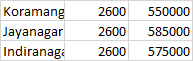

In [ ]:
model.predict([[0,2600],[1,2600],[2,2600]])

In [ ]:
model.score(X,y)

In [ ]:
try:
  df.drop('town_no', axis='columns',inplace=True)
except:
  pass

In [ ]:
df

In [ ]:
#help(pd.get_dummies)

In [ ]:
dummies = pd.get_dummies(df['Town'])
dummies

In [ ]:
#Area, price, Indiranagar	Jayanagar	Koramangala
#2600,  55000,  0,           0,         1
#----  -----   --            --        --
#3600  695000,  1            0,         0

In [ ]:
#concat dummies and df 
df_dummies = pd.concat([df, dummies], axis='columns')
df_dummies

In [ ]:
X = df_dummies.drop(['Town','Price'], axis='columns')
y = df['Price']

In [ ]:
model.fit(X,y)

In [ ]:
model.score(X,y)

0.9573929037221873

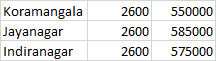

In [ ]:
model.predict([[2600,0,0,1],[2600,0,1,0],[2600,1,0,0]])

In [ ]:
X.head(1)

,Area,Indiranagar,Jayanagar,Koramangala
0,2600,0,0,1


In [ ]:
df_dummies.drop('Koramangala', axis='columns', inplace=True)

In [ ]:
df_dummies.columns

Index(['Town', 'Area', 'Price', 'Indiranagar', 'Jayanagar'], dtype='object')

In [ ]:
X = df_dummies.drop(['Town','Price'], axis='columns')
y = df['Price']

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.score(X,y)

0.9573929037221872

In [ ]:
model.predict([[2600,0,0],[2600,0,1],[2600,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([539709.7398409 , 579723.71533004, 565396.1513653 ])

In [ ]:
#Labeencoder
le = LabelEncoder()
df['town_no'] = le.fit_transform(df['Town'])
df

,Town,Area,Price,town_no
0,Koramangala,2600,550000,2
1,Koramangala,3000,565000,2
2,Koramangala,3200,610000,2
3,Koramangala,3600,680000,2
4,Koramangala,4000,725000,2
5,Jayanagar,2600,585000,1
6,Jayanagar,2800,615000,1
7,Jayanagar,3300,650000,1
8,Jayanagar,3600,710000,1
9,Indiranagar,2600,575000,0


In [ ]:
#model training
model.fit(df[['Area','town_no']], df['Price'])

LinearRegression()

In [ ]:
#Prediction
model.predict([[2600,2],[2660,1],[2600,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([549087.57114008, 569969.81824858, 575969.15733431])

In [ ]:
X = df[['Area','town_no']]
y = df['Price']

In [ ]:
model.score(X,y)

0.9067640212781202